# 다중퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### 데이터 셋 준비 
- 로이터에서 제공하는 뉴스와이어 데이터셋을 이용
- 이 데이터셋은 총 11,228개의 샘플로 구성
- 라벨은 46개 주제로 지정되어 0에서 45의 값을 가지고 있음
- 데이터셋은 이미 정수로 인코딩되어 있으며, 정수값은 단어의 빈도수를 나타냄 
- 모든 단어를 고려할 수 없으므로 빈도수가 높은 단어를 위주로 데이터셋을 생성
- 15,000번째로 많이 사용하는 단어까지만 데이터셋으로 만들고 싶다면, num_words 인자에 15000이라고 지정하면 됨

In [2]:
max_features = 15000
text_max_words = 120

### 1. 데이터셋 생성하기
#### 훈련셋과 시험셋 불러오기

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

#### 훈련셋과 검증셋 분리
- 훈련셋 8,982개와 시험셋 2,246개로 구성된 총 11,228개 샘플이 로딩
- 훈련셋과 시험셋의 비율은 load_data() 함수의 test_split 인자로 조절 가능 함
- 각 샘플은 뉴스 한 건을 의미하며, 단어의 인덱스로 구성되어 있습니다. 
- num_words=20000으로 지정했기 때문에 빈도수가 15,000을 넘는 단어는 로딩되지 않음
- 훈련셋 8,982개 중 다시 7,000개을 훈련셋으로 나머지를 검증셋으로 분리

In [4]:
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

#### 데이터셋 전처리 : 문장 길이 맞추기
- 각 샘플의 길이가 달라서 모델의 입력으로 사용하기 위해 케라스에서 제공되는 전처리 함수인 sequence의 pad_sequences() 함수를 사용
- 이 함수는 두 가지 역할을 수행함
    - 문장의 길이를 maxlen 인자로 맞춰줌 
    - 예를 들어 120으로 지정했다면 120보다 짧은 문장은 0으로 채워서 120단어로 맞춰주고 120보다 긴 문장은 120단어까지만 잘라냄
    - (num_samples, num_timesteps)으로 2차원의 numpy 배열로 만들어줍니다. 
    - maxlen을 120으로 지정하였다면, num_timesteps도 120이 됩니다.

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

#### one-hot 인코딩

In [6]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 2. 모델 구성하기(다층퍼셉트론 신경망 모델)
- 임베딩 레이어는 0에서 45의 정수값으로 지정된 단어를 128벡터로 인코딩합니다. 
- 문장의 길이가 120이므로 임베딩 레이어는 128 속성을 가진 벡터를 120개 반환합니다. 
- 이를 Flatten 레이어를 통해 1차원 벡터로 만든 뒤 전결합층으로 전달합니다. 
- 46개 주제를 분류해야 하므로 출력층의 활성화 함수로 ‘softmax’를 사용하였습니다.)

In [7]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

### 3. 모델 학습과정 설정하기

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4. 모델 학습시키기

In [9]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
110/110 [==============================] - 3s 24ms/step - loss: 1.9304 - accuracy: 0.5263 - val_loss: 1.4702 - val_accuracy: 0.6483
Epoch 2/10
110/110 [==============================] - 3s 23ms/step - loss: 0.8373 - accuracy: 0.8046 - val_loss: 1.2935 - val_accuracy: 0.6978
Epoch 3/10
110/110 [==============================] - 3s 23ms/step - loss: 0.2682 - accuracy: 0.9511 - val_loss: 1.4238 - val_accuracy: 0.6826
Epoch 4/10
110/110 [==============================] - 3s 23ms/step - loss: 0.1850 - accuracy: 0.9621 - val_loss: 1.3513 - val_accuracy: 0.6993
Epoch 5/10
110/110 [==============================] - 3s 23ms/step - loss: 0.1521 - accuracy: 0.9637 - val_loss: 1.3842 - val_accuracy: 0.6912
Epoch 6/10
110/110 [==============================] - 2s 23ms/step - loss: 0.1346 - accuracy: 0.9639 - val_loss: 1.3686 - val_accuracy: 0.6942
Epoch 7/10
110/110 [==============================] - 2s 23ms/step - loss: 0.1255 - accuracy: 0.9614 - val_loss: 1.3787 - val_accuracy: 0.6948

### 5. 학습과정 살펴보기

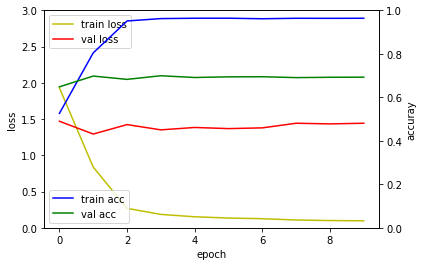

In [10]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [11]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

36/36 [==============================] - 0s 2ms/step - loss: 1.4453 - accuracy: 0.6874
## evaluation loss and_metrics ##
[1.445327877998352, 0.6874443292617798]
